In [1]:
import os
os.environ['AEON_DEPRECATION_WARNING'] = 'False'

import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

In [2]:
date = "30-01-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_16_2-"+date+".csv",
         "tlb_all_ucr_16_4-"+date+".csv",
         "tlb_all_ucr_16_8-"+date+".csv",
         "tlb_all_ucr_16_16-"+date+".csv",
         "tlb_all_ucr_16_32-"+date+".csv",
         "tlb_all_ucr_16_64-"+date+".csv",
         "tlb_all_ucr_16_128-"+date+".csv",
         "tlb_all_ucr_16_256-"+date+".csv"]

configs = [2, 4, 8, 16, 32, 64, 128, 256] # 2, 
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA ED", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA ED +VAR", # + str(configs[i]),
               "sfa_equi-width_False": "SFA EW", # + str(configs[i]),
               "sfa_equi-width_True": "SFA EW +VAR", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
590,iSAX,Yoga,0.933442,256
591,SFA EW +VAR,Yoga,0.982416,256
592,SFA EW,Yoga,0.982416,256
593,SFA ED +VAR,Yoga,0.980372,256


In [3]:
# ASAX!
date = "30-01-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_ASAX_16_2-"+date+".csv",
         "tlb_all_ucr_ASAX_16_4-"+date+".csv",
         "tlb_all_ucr_ASAX_16_8-"+date+".csv",
         "tlb_all_ucr_ASAX_16_16-"+date+".csv",
         "tlb_all_ucr_ASAX_16_32-"+date+".csv",
         "tlb_all_ucr_ASAX_16_64-"+date+".csv",
         "tlb_all_ucr_ASAX_16_128-"+date+".csv",
         "tlb_all_ucr_ASAX_16_256-"+date+".csv"]

# df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
27,ASAX,SonyAIBORobotSurface1,0.586334,256
28,ASAX,SonyAIBORobotSurface2,0.610989,256
29,ASAX,SyntheticControl,0.710000,256
30,ASAX,TwoLeadECG,0.746334,256


In [4]:
# SAX-TD!
date = "30-01-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_SAX_TD_16_2-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_4-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_8-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_16-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_32-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_64-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_128-"+date+".csv",
         "tlb_all_ucr_SAX_TD_16_256-"+date+".csv"]

# df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
114,SAX-TD,Wine,0.286855,256
115,SAX-TD,WordSynonyms,0.546495,256
116,SAX-TD,Worms,0.500199,256
117,SAX-TD,WormsTwoClass,0.500199,256


In [5]:
# SPARTAN
date = "06-02-25"   # new

path = "TLB_logs/"
files = ["tlb_all_ucr_SPARTAN_16_2-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_4-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_8-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_16-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_32-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_64-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_128-"+date+".csv",
         "tlb_all_ucr_SPARTAN_16_256-"+date+".csv"]

# df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
233,SPARTAN_DAA,Worms,0.844621,256
234,SPARTAN_wo_DAA,WormsTwoClass,0.844030,256
235,SPARTAN_DAA,WormsTwoClass,0.844416,256
236,SPARTAN_wo_DAA,Yoga,0.970160,256


In [6]:
# SOFA with Dynamic Alphabet Sizes
date = "26_02_25" 
path = "TLB_logs/"
files = ["tlb_all_ucr_16_2-"+date+".csv",
         "tlb_all_ucr_16_4-"+date+".csv",
         "tlb_all_ucr_16_8-"+date+".csv",
         "tlb_all_ucr_16_16-"+date+".csv",
         "tlb_all_ucr_16_32-"+date+".csv",
         "tlb_all_ucr_16_64-"+date+".csv",
         "tlb_all_ucr_16_128-"+date+".csv",
         "tlb_all_ucr_16_256-"+date+".csv"]

mapping = {"sfa_equi-width_True_True_0.3": "SFA EW+VAR+DAA+0.3",
           "sfa_equi-width_True_True_0.4": "SFA EW+VAR+DAA+0.4",
           "sfa_equi-width_True_True_0.5": "SFA EW+VAR+DAA",
           "sfa_equi-width_True_True_0.6": "SFA EW+VAR+DAA+0.6"}

for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]    
    df = df[df.Method == "sfa_equi-width_True_True_0.5"]
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    # display(df)
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
573,SFA EW+VAR+DAA,Wine,0.879917,256
578,SFA EW+VAR+DAA,WordSynonyms,0.951509,256
583,SFA EW+VAR+DAA,Worms,0.860873,256
588,SFA EW+VAR+DAA,WormsTwoClass,0.860873,256


In [7]:
# SOFA with Dynamic Alphabet Sizes - Part 2
date = "02_06_25" 
path = "TLB_logs/"
files = ["tlb_all_ucr_16_2-"+date+".csv",
         "tlb_all_ucr_16_4-"+date+".csv",
         "tlb_all_ucr_16_8-"+date+".csv",
         "tlb_all_ucr_16_16-"+date+".csv",
         "tlb_all_ucr_16_32-"+date+".csv",
         "tlb_all_ucr_16_64-"+date+".csv",
         "tlb_all_ucr_16_128-"+date+".csv",
         "tlb_all_ucr_16_256-"+date+".csv"]

mapping = {"sfa_equi-width_True_True_dynamic_programming": "SOFA+DAA",
           "sfa_equi-width_True_True_linear_scale": "SOFA+Linear",
           "sfa_equi-width_True_True_log_scale": "SOFA+Log",
           "sfa_equi-width_True_True_sqrt_scale": "SOFA+Sqrt",}


df_alloc = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)        
    df["Config"] = configs[i]
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})

    df_all = pd.concat([df_all, df])
    df_alloc = pd.concat([df_alloc, df])

df_alloc = df_alloc.infer_objects()
df = df_all
df = df.infer_objects()

display(df)

,Method,Dataset,TLB,Config
0,iSAX,ArrowHead,0.189124,2
1,SFA EW +VAR,ArrowHead,0.392859,2
2,SFA EW,ArrowHead,0.389278,2
3,SFA ED +VAR,ArrowHead,0.416231,2
4,SFA ED,ArrowHead,0.411105,2
...,...,...,...,...
590,isax,Yoga,0.933442,256
591,SOFA+DAA,Yoga,0.984930,256
592,SOFA+Linear,Yoga,0.984988,256
593,SOFA+Log,Yoga,0.984943,256


In [8]:
df[["Method", "TLB", "Config"]] \
        .groupby(["Method", "Config"]).median() \
        .sort_values(by=["Config", "TLB"], ascending=True) # "Method", 

,,TLB
Method,Config,
ASAX,2,0.000000
SAX-TD,2,0.000000
SPARTAN_DAA,2,0.000000
SPARTAN_wo_DAA,2,0.000000
iSAX,2,0.280251
...,...,...
SOFA+Log,256,0.876280
SOFA+Sqrt,256,0.876555
SOFA+DAA,256,0.876649


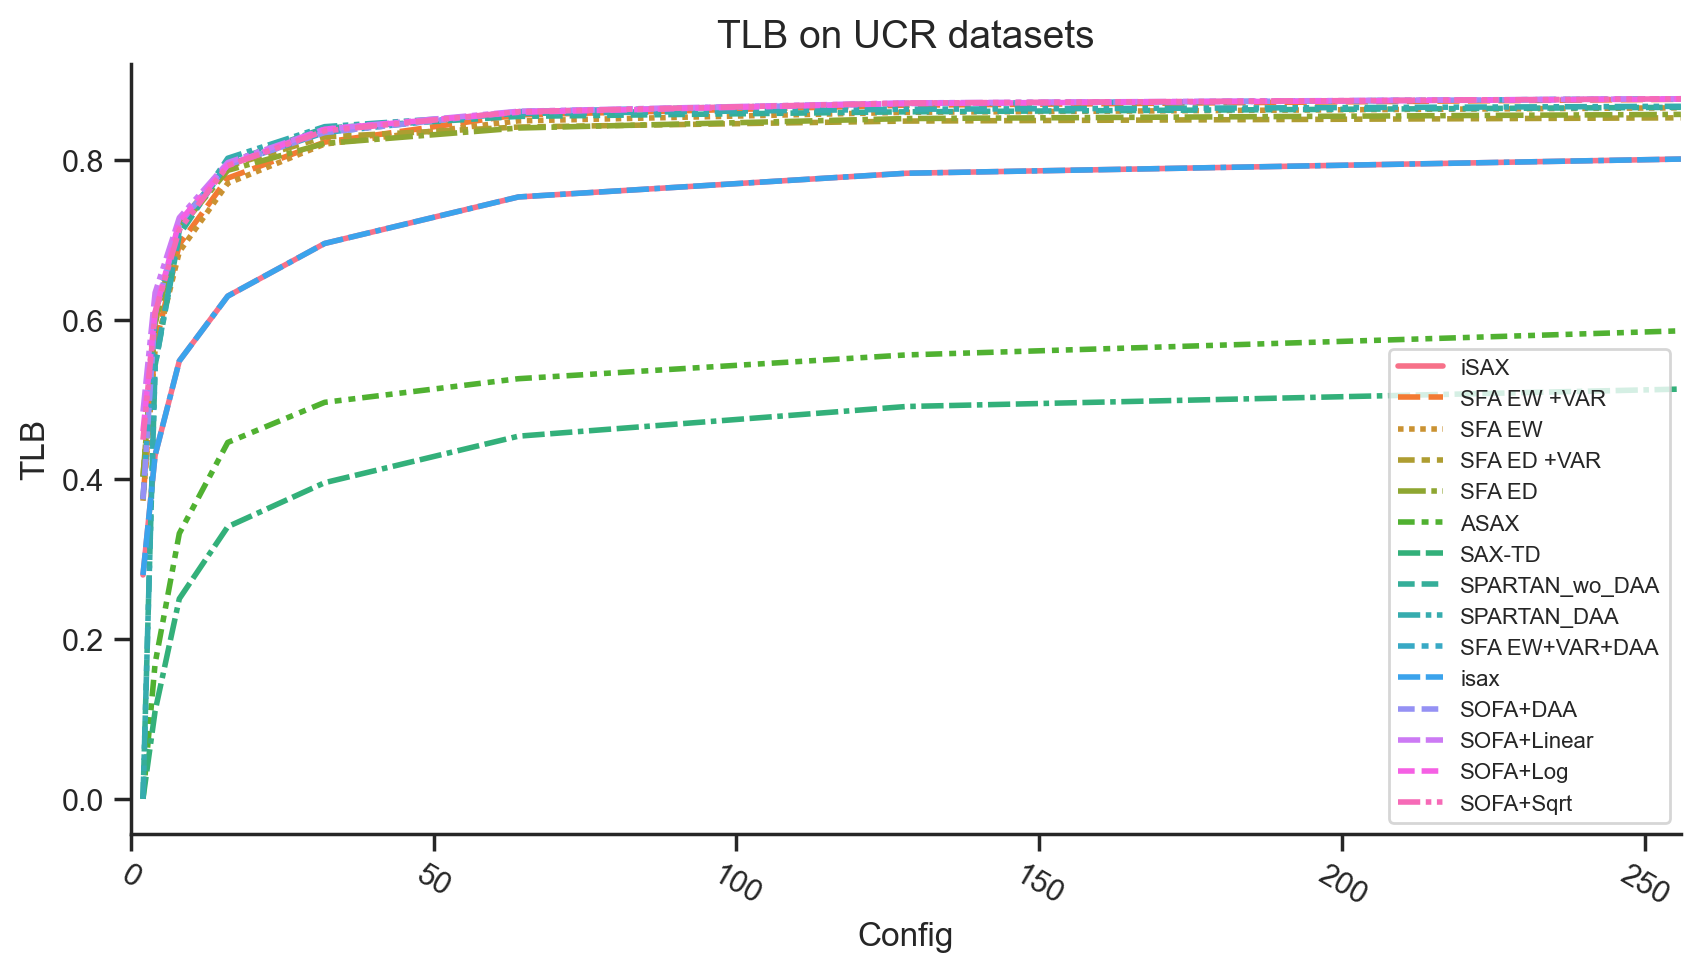

In [9]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.lineplot(
    x="Config", y="TLB", hue="Method", style="Method", estimator=np.median,
    data=df, err_style="bars", errorbar=("se", 0), ax=ax, lw=2
)
ax.set_title("TLB on UCR datasets", fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_xlim([0,256])
sns.despine()
plt.legend(fontsize=8)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()
# plt.tight_layout()
# plt.savefig("images/tlb_ucr_lineplot"+date+".pdf", bbox_inches='tight')

In [10]:
df_sub = df[df.Method.isin(["SFA EW +VAR", "SFA ED +VAR", "iSAX", "ASAX", "SAX-TD", 
                            "SPARTAN_wo_DAA", "SPARTAN_DAA", "SFA EW+VAR+DAA+0.5"])]
result = df_sub[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).median() \
        .pivot_table(columns="Config", index="Method")

result

TLB                                                    \
Config               2         4         8         16        32        64    
Method                                                                       
ASAX            0.000000  0.169294  0.332245  0.446244  0.496446  0.526056   
SAX-TD          0.000000  0.109752  0.250484  0.340708  0.395816  0.454073   
SFA ED +VAR     0.403692  0.596170  0.721877  0.792123  0.828831  0.841231   
SFA EW +VAR     0.375152  0.566941  0.694257  0.777266  0.822309  0.856476   
SPARTAN_DAA     0.000000  0.542588  0.711777  0.802142  0.841696  0.858189   
SPARTAN_wo_DAA  0.000000  0.542588  0.706232  0.796525  0.839879  0.854569   
iSAX            0.280251  0.430142  0.548232  0.629487  0.695433  0.753660   

                                    
Config               128       256  
Method                              
ASAX            0.555803  0.586022  
SAX-TD          0.491215  0.513049  
SFA ED +VAR     0.848702  0.852754  
SFA EW +VAR     0.868577  0.875971  
SPARTAN_DAA     0.863497  0.867202  
SPARTAN_wo_DAA  0.860311  0.865946  
iSAX            0.783346  0.801139

In [11]:
print(result.to_markdown())

| Method         |   ('TLB', 2) |   ('TLB', 4) |   ('TLB', 8) |   ('TLB', 16) |   ('TLB', 32) |   ('TLB', 64) |   ('TLB', 128) |   ('TLB', 256) |
|:---------------|-------------:|-------------:|-------------:|--------------:|--------------:|--------------:|---------------:|---------------:|
| ASAX           |     0        |     0.169294 |     0.332245 |      0.446244 |      0.496446 |      0.526056 |       0.555803 |       0.586022 |
| SAX-TD         |     0        |     0.109752 |     0.250484 |      0.340708 |      0.395816 |      0.454073 |       0.491215 |       0.513049 |
| SFA ED +VAR    |     0.403692 |     0.59617  |     0.721877 |      0.792123 |      0.828831 |      0.841231 |       0.848702 |       0.852754 |
| SFA EW +VAR    |     0.375152 |     0.566941 |     0.694257 |      0.777266 |      0.822309 |      0.856476 |       0.868577 |       0.875971 |
| SPARTAN_DAA    |     0        |     0.542588 |     0.711777 |      0.802142 |      0.841696 |      0.858189 |       0.8634

In [12]:
# print(result.to_latex())

/opt/miniconda3/lib/python3.12/site-packages/aeon/visualisation/results/_critical_difference.py:217: UserWarning: Estimators iSAX and isax have the same performanceon all datasets. This may cause problems when forming cliques.
  p_values = wilcoxon_test(ordered_scores, ordered_labels, lower_better)


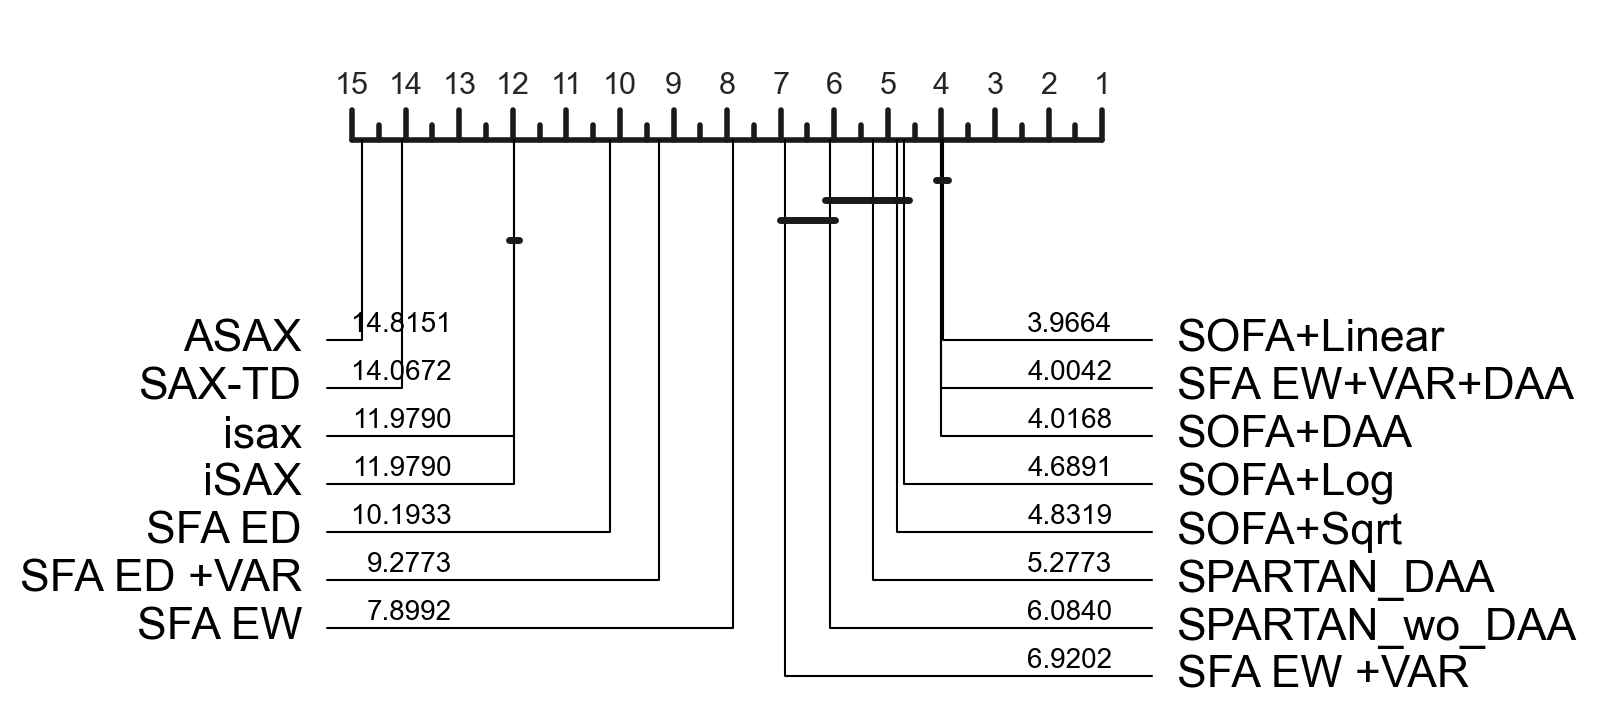

In [13]:
df_pivot = df[df.Config==256].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot.fillna(0, inplace=True)
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
plt.show()
#plt.tight_layout()
# plt.savefig("images/tlb_UCR_cd_diagramm"+date+".pdf", bbox_inches='tight')

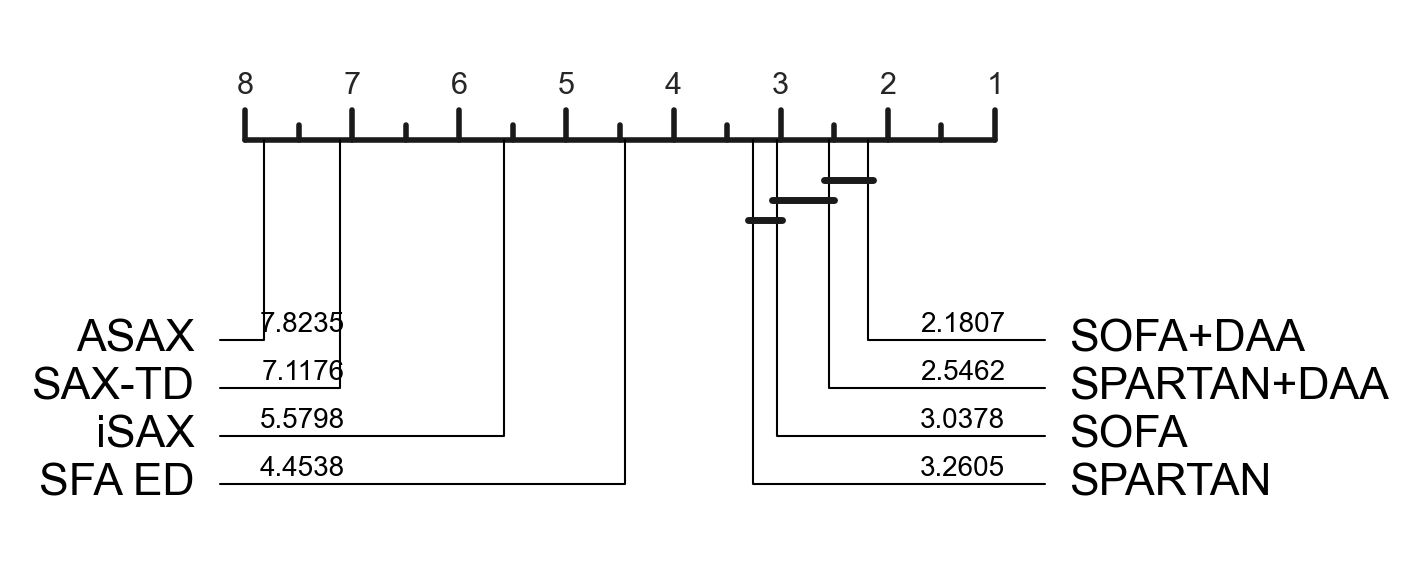

In [14]:
df_sub2 = df[df.Method.isin(["SFA EW +VAR",  "SFA ED", "iSAX", "ASAX", "SAX-TD", "SPARTAN_DAA", "SPARTAN_wo_DAA", "SFA EW+VAR+DAA"])]
df_sub2 = df_sub2.copy()
df_sub2.Method = df_sub2.Method.replace({"SFA EW +VAR": "SOFA"})
df_sub2.Method = df_sub2.Method.replace({"SFA EW+VAR+DAA": "SOFA+DAA"})
df_sub2.Method = df_sub2.Method.replace({"SPARTAN_DAA": "SPARTAN+DAA"})
df_sub2.Method = df_sub2.Method.replace({"SPARTAN_wo_DAA": "SPARTAN"})

df_pivot2 = df_sub2[df_sub2.Config==256].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot2.fillna(0, inplace=True)

ax = plot_critical_difference(
    scores=df_pivot2.to_numpy(),
    labels=df_pivot2.columns.to_numpy(),
    #errors=False,
    alpha=0.05,
)

plt.show()
#plt.tight_layout()
# plt.savefig("images/tlb_UCR_cd_diagramm"+date+"2.pdf", bbox_inches='tight')

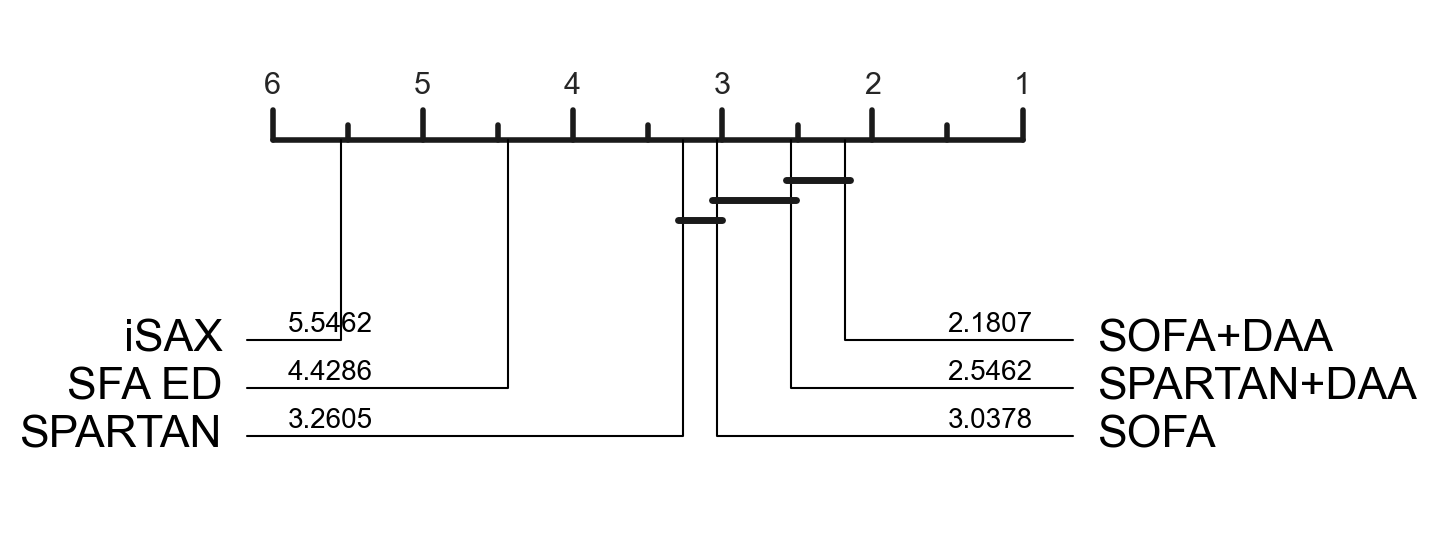

In [15]:
df_sub2 = df[df.Method.isin(["SFA EW +VAR", "SFA ED", "SFA EW+VAR+DAA", "SPARTAN_DAA", "SPARTAN_wo_DAA", "iSAX"])]
df_sub2 = df_sub2.copy()
df_sub2.Method = df_sub2.Method.replace({"SFA EW +VAR": "SOFA"})
df_sub2.Method = df_sub2.Method.replace({"SFA EW+VAR+DAA": "SOFA+DAA"})
df_sub2.Method = df_sub2.Method.replace({"SPARTAN_DAA": "SPARTAN+DAA"})
df_sub2.Method = df_sub2.Method.replace({"SPARTAN_wo_DAA": "SPARTAN"})

df_pivot2 = df_sub2[df_sub2.Config==256].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot2.fillna(0, inplace=True)

ax = plot_critical_difference(
    scores=df_pivot2.to_numpy(),
    labels=df_pivot2.columns.to_numpy(),
    #errors=False,
    alpha=0.05,
)

plt.show()
#plt.tight_layout()
# plt.savefig("images/tlb_UCR_cd_diagramm"+date+"3.pdf", bbox_inches='tight')

# Alloc Methods

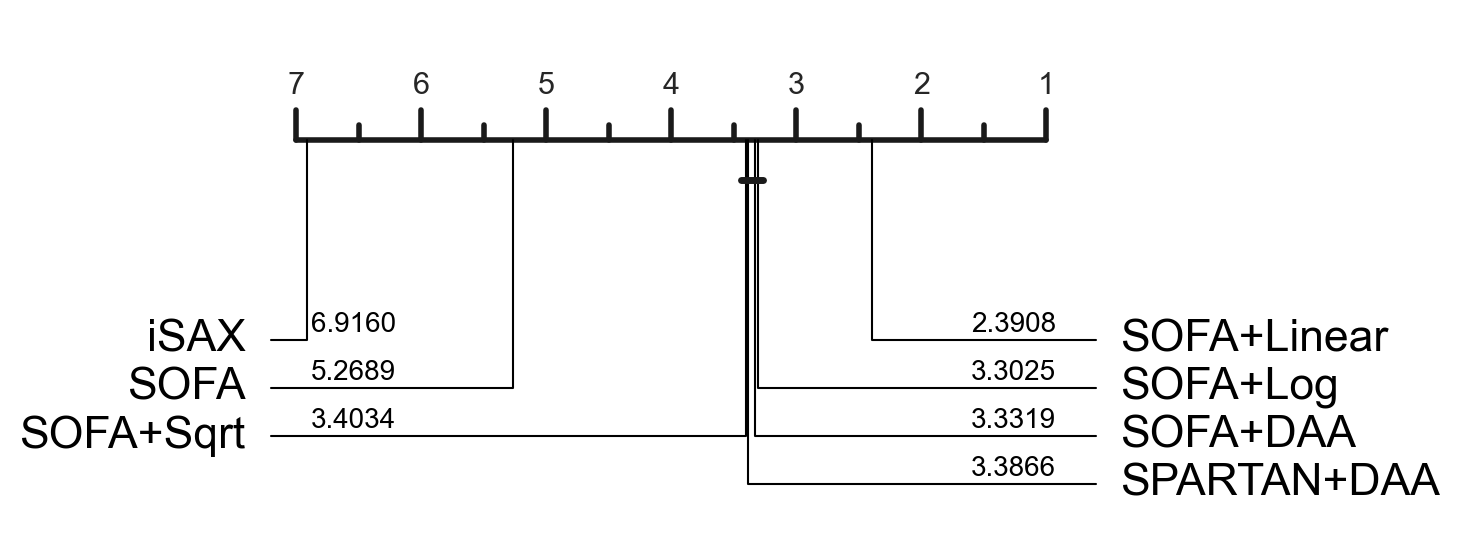

In [16]:
df_sub2 = df[df.Method.isin(["iSAX", "SOFA+DAA", "SOFA+Sqrt", "SOFA+Log", "SOFA+Linear", "SFA EW +VAR", "SPARTAN_DAA"])]
# df_sub2 = df[df.Method.isin([ "SFA EW +VAR", "SOFA+DAA", "SPARTAN_DAA"])]
df_sub2 = df_sub2.copy()
df_sub2.Method = df_sub2.Method.replace({"SFA EW +VAR": "SOFA"})
df_sub2.Method = df_sub2.Method.replace({"SPARTAN_DAA": "SPARTAN+DAA"})

config = 64
df_pivot2 = df_sub2[df_sub2.Config==config].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot2.fillna(0, inplace=True)

ax = plot_critical_difference(
    scores=df_pivot2.to_numpy(),
    labels=df_pivot2.columns.to_numpy(),
    #errors=False,
    alpha=0.05,
)

plt.show()
#plt.tight_layout()
# plt.savefig("images/tlb_UCR_cd_diagramm"+date+"3.pdf", bbox_inches='tight')

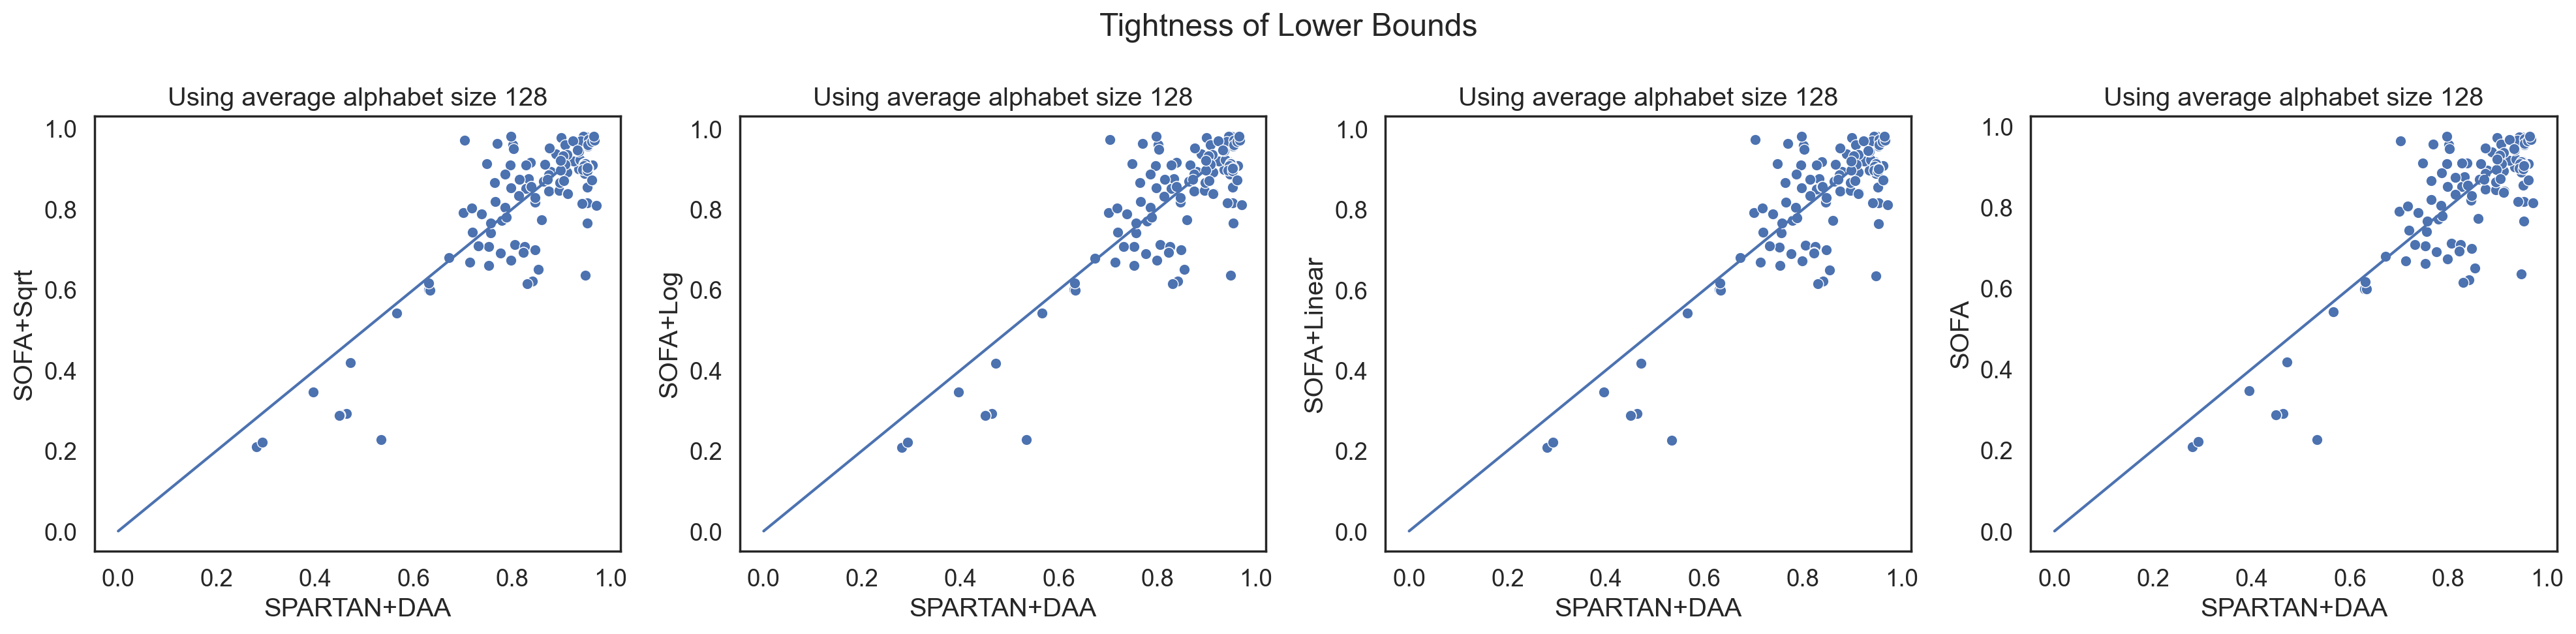

In [23]:
sns.set(font_scale=1.2)
sns.set_style("white")

fig, ax = plt.subplots(1, 4, figsize=(20,5))

coefficients = 128
df_pivot = df_sub2[df_sub2.Config == coefficients].pivot_table(index="Dataset", columns=["Method"], values=["TLB"])
df_pivot.reset_index(drop=True)
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot = df_pivot.round(6)
# display(df_pivot)

pairs = ["SOFA+Sqrt", "SOFA+Log", "SOFA+Linear", "SOFA"]

for i, pair in enumerate(pairs):
    sns.scatterplot(x = "SPARTAN+DAA", y =  pair, data = df_pivot, ax = ax[i])
    ax[i].plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
    ax[i].set_title(f"Using average alphabet size {coefficients}")
    # ax[i].set_title("TLB")    

plt.suptitle("Tightness of Lower Bounds")
plt.tight_layout()
plt.show()

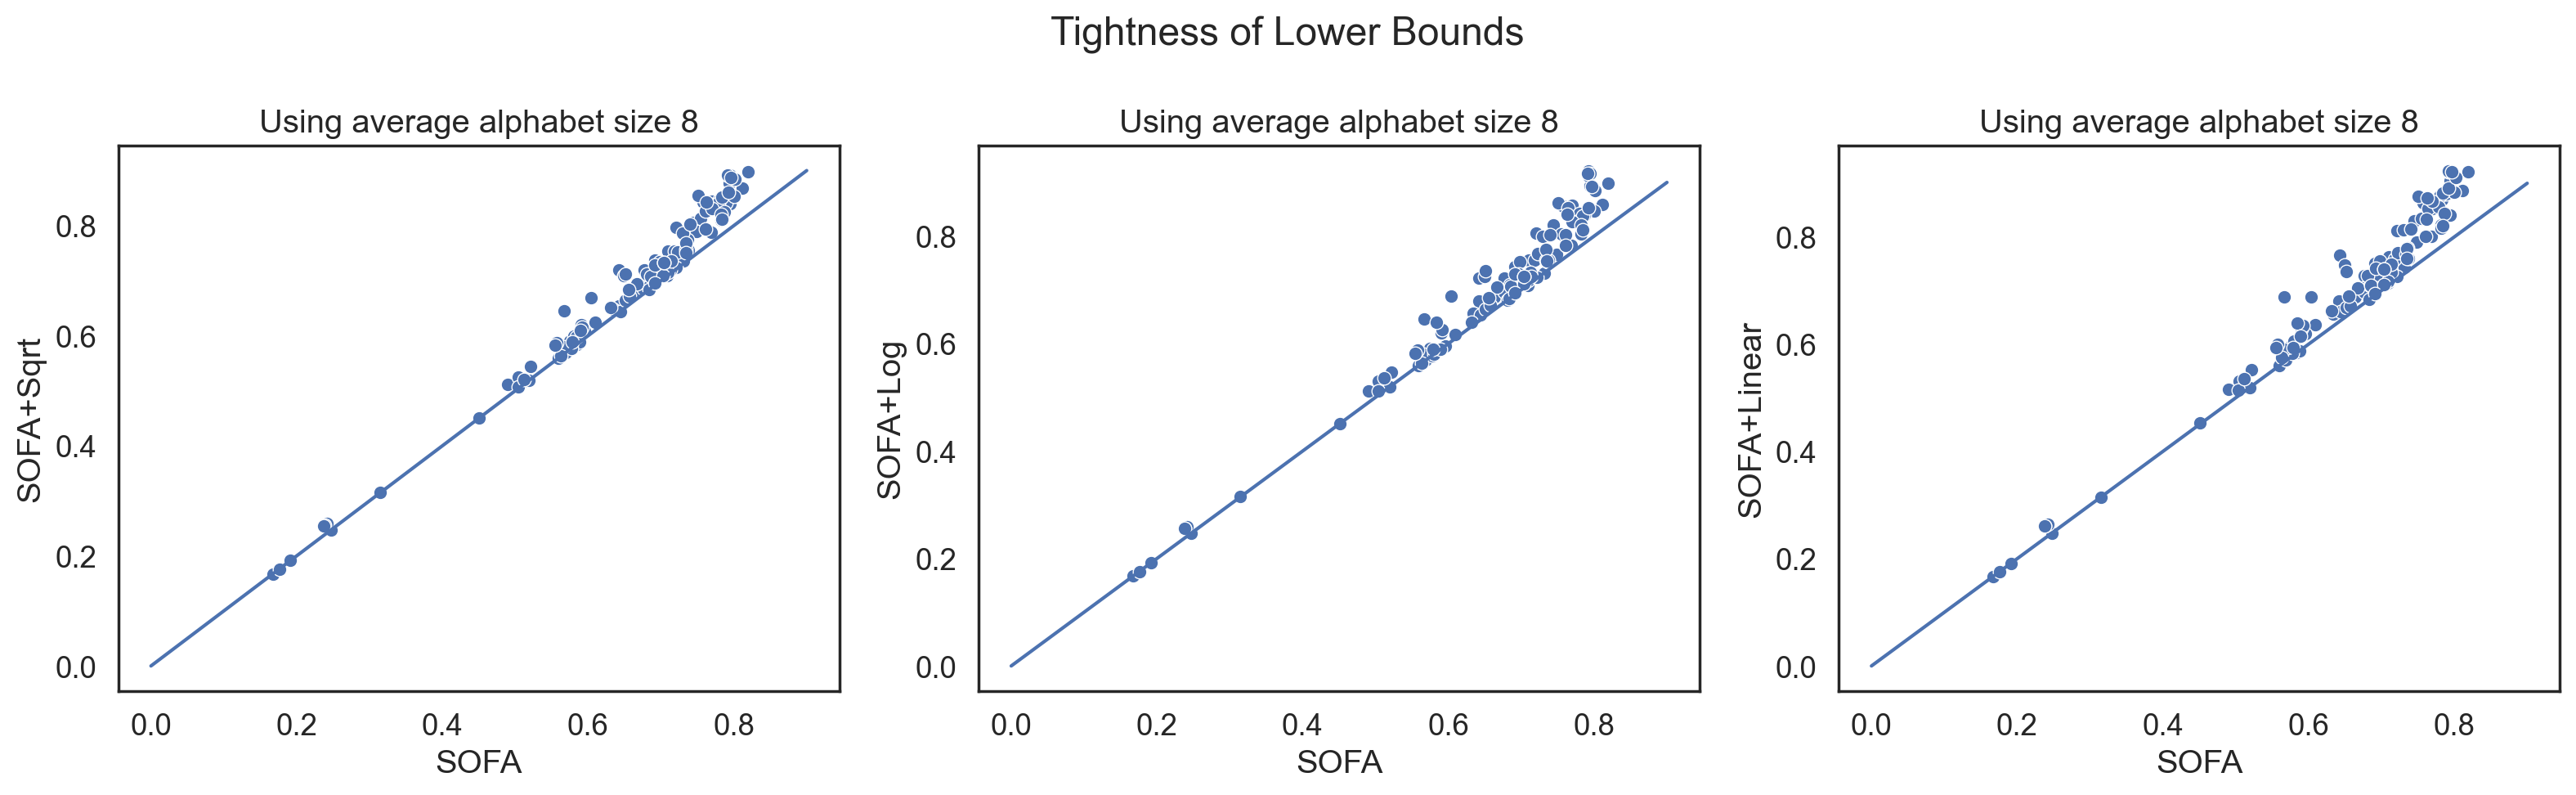

In [22]:
sns.set(font_scale=1.2)
sns.set_style("white")

fig, ax = plt.subplots(1, 3, figsize=(16,5))

coefficients = 8
df_pivot = df_sub2[df_sub2.Config == coefficients].pivot_table(index="Dataset", columns=["Method"], values=["TLB"])
df_pivot.reset_index(drop=True)
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot = df_pivot.round(6)
# display(df_pivot)

pairs = ["SOFA+Sqrt", "SOFA+Log", "SOFA+Linear"]

for i, pair in enumerate(pairs):
    sns.scatterplot(x = "SOFA", y =  pair, data = df_pivot, ax = ax[i])
    ax[i].plot(np.arange(0, 1, 0.1), np.arange(0, 1, 0.1))
    ax[i].set_title(f"Using average alphabet size {coefficients}")
    # ax[i].set_title("TLB")    

plt.suptitle("Tightness of Lower Bounds")
plt.tight_layout()
plt.show()

In [19]:

pd.set_option('display.float_format', '{:.3f}'.format)
result = df_sub2[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).median() \
        .pivot_table(columns="Config", index="Method")*100

result

# df_sub2.groupby("Method")["TLB"].mean()*100

TLB                                                 
Config         2      4      8      16     32     64     128    256
Method                                                             
SOFA        37.515 56.694 69.426 77.727 82.231 85.648 86.858 87.597
SOFA+DAA    37.515 60.713 72.019 79.384 83.433 86.048 87.084 87.665
SOFA+Linear 48.475 63.373 72.770 79.669 83.859 86.097 87.146 87.666
SOFA+Log    46.017 60.967 72.266 79.353 83.849 85.977 87.075 87.628
SOFA+Sqrt   44.958 60.842 71.269 79.280 83.631 86.043 87.128 87.655
SPARTAN+DAA  0.000 54.259 71.178 80.214 84.170 85.819 86.350 86.720
iSAX        28.025 43.014 54.823 62.949 69.543 75.366 78.335 80.114

In [20]:
print(result.to_markdown())

| Method      |   ('TLB', 2) |   ('TLB', 4) |   ('TLB', 8) |   ('TLB', 16) |   ('TLB', 32) |   ('TLB', 64) |   ('TLB', 128) |   ('TLB', 256) |
|:------------|-------------:|-------------:|-------------:|--------------:|--------------:|--------------:|---------------:|---------------:|
| SOFA        |      37.5152 |      56.6941 |      69.4257 |       77.7266 |       82.2309 |       85.6476 |        86.8577 |        87.5971 |
| SOFA+DAA    |      37.5152 |      60.7131 |      72.0187 |       79.3845 |       83.4326 |       86.0484 |        87.0835 |        87.6649 |
| SOFA+Linear |      48.4749 |      63.3731 |      72.7695 |       79.6692 |       83.8591 |       86.0971 |        87.1459 |        87.6656 |
| SOFA+Log    |      46.0171 |      60.9669 |      72.2656 |       79.3528 |       83.8492 |       85.9773 |        87.075  |        87.628  |
| SOFA+Sqrt   |      44.9584 |      60.8419 |      71.2686 |       79.2801 |       83.6312 |       86.0426 |        87.1275 |        87.6555 |

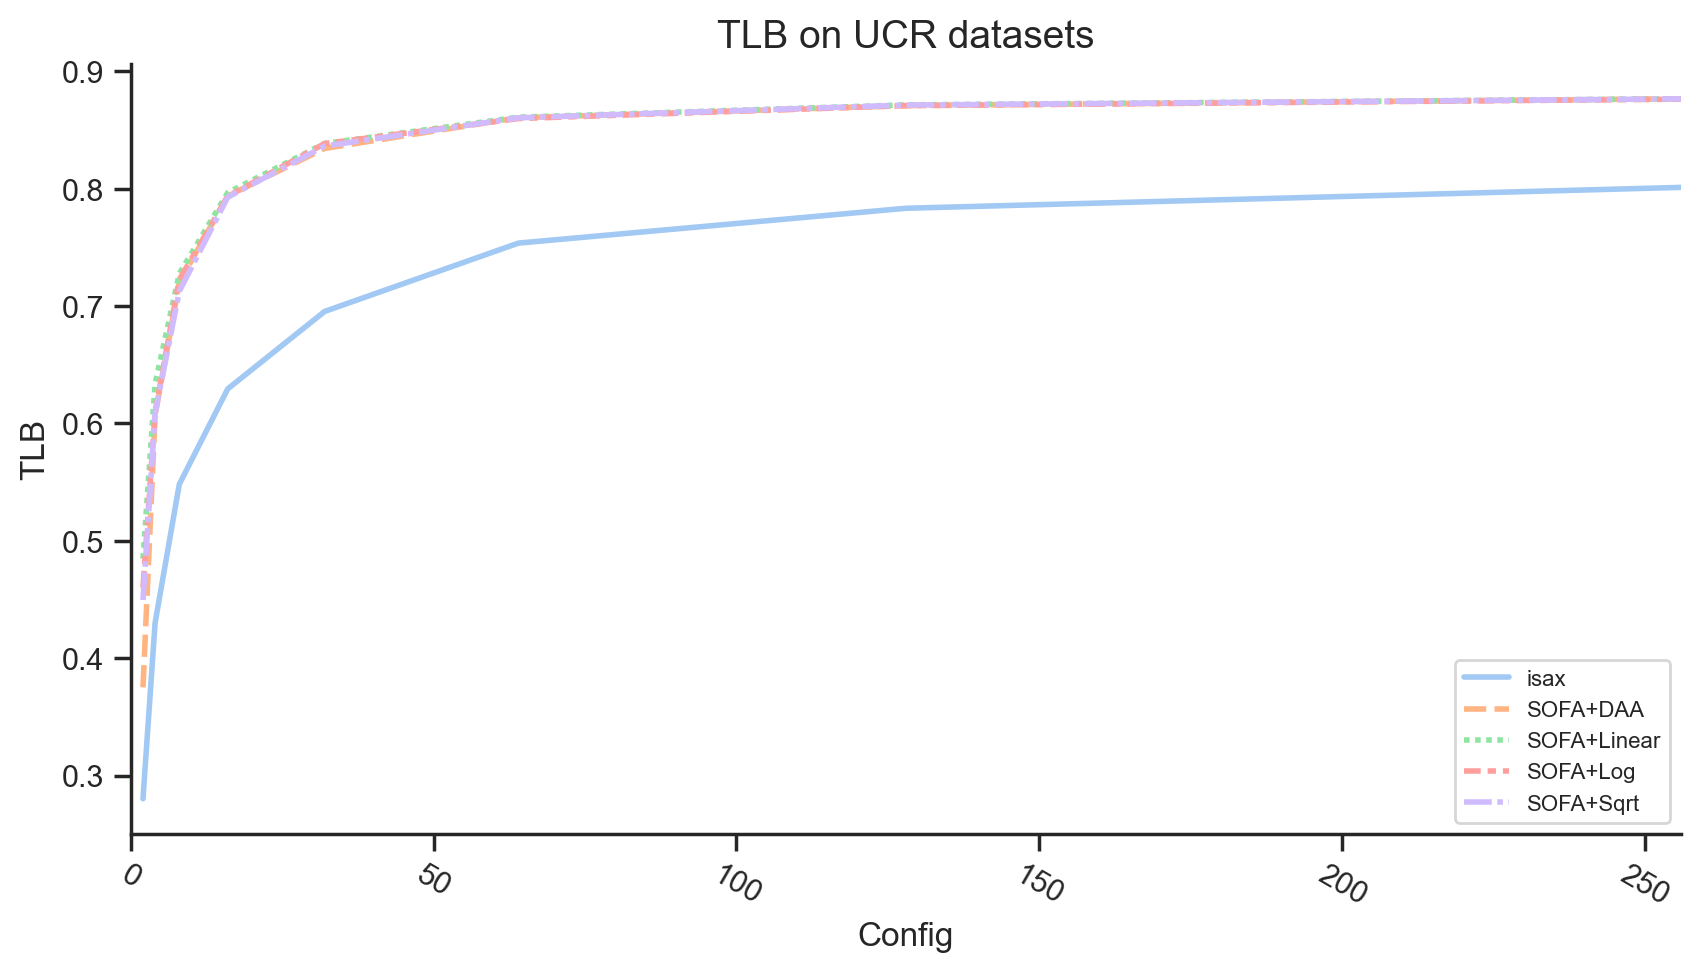

In [21]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.lineplot(
    x="Config", y="TLB", hue="Method", style="Method", estimator=np.median,
    data=df_alloc, err_style="bars", errorbar=("se", 0), ax=ax, lw=2
)
ax.set_title("TLB on UCR datasets", fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_xlim([0,256])
sns.despine()
plt.legend(fontsize=8)
plt.show()

/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_94158/324715149.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


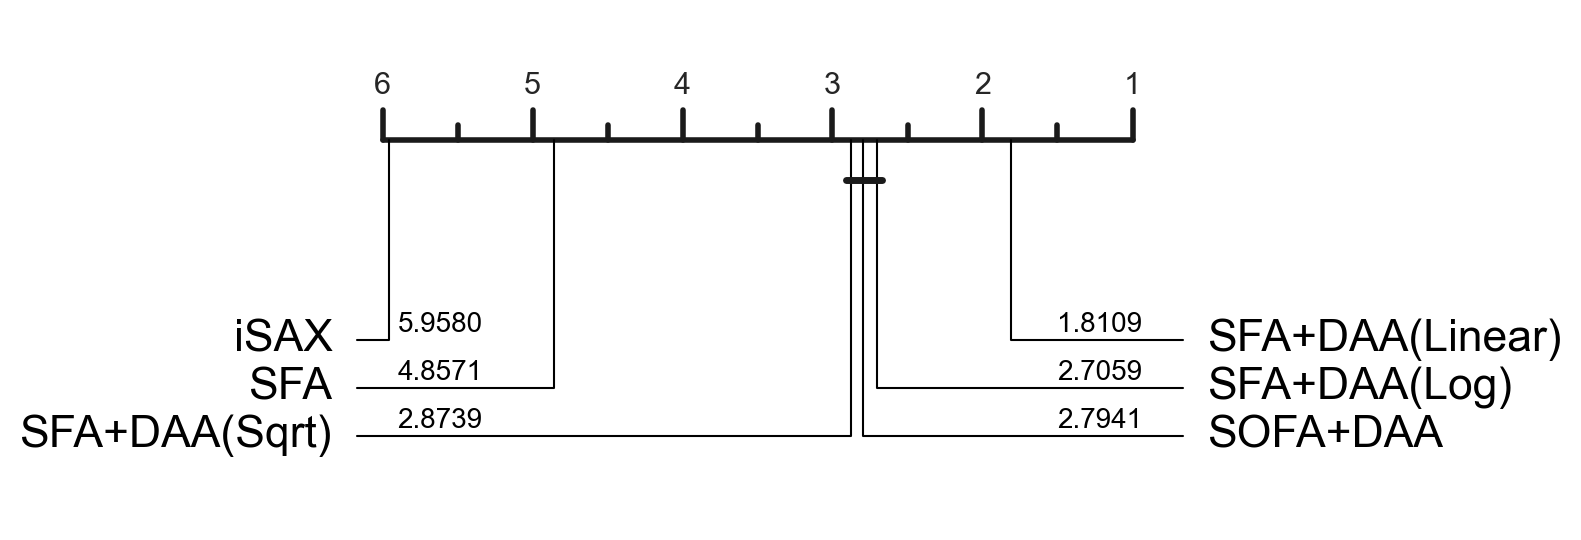

In [22]:
config = 64
df_sub2 = df[df.Method.isin(["SFA EW", "SOFA+DAA",  "SOFA+Sqrt", "SOFA+Log", "SOFA+Linear",  "iSAX"])]
df_sub2 = df_sub2.copy()
df_sub2.Method = df_sub2.Method.replace({"SFA EW": "SFA"})
# df_sub2.Method = df_sub2.Method.replace({"SFA ED": "SFA+Equi-Depth (ED)"})
df_sub2.Method = df_sub2.Method.replace({"SOFA+Sqrt": "SFA+DAA(Sqrt)"})
df_sub2.Method = df_sub2.Method.replace({"SOFA+Log": "SFA+DAA(Log)"})
df_sub2.Method = df_sub2.Method.replace({"SOFA+Linear": "SFA+DAA(Linear)"})

df_pivot2 = df_sub2[df_sub2.Config==config].pivot(index='Dataset', columns='Method', values='TLB')
df_pivot2.fillna(0, inplace=True)

ax = plot_critical_difference(
    scores=df_pivot2.to_numpy(),
    labels=df_pivot2.columns.to_numpy(),
    #errors=False,
    alpha=0.05,
)

plt.tight_layout()
plt.savefig("images/tlb_UCR_cd_diagramm_aeon_daa.pdf", bbox_inches='tight')


plt.show()
